# The Flights in the 2008 year in U.S.A
## by: Alaa Alaboud

## Investigation Overview

Our Investigation is to get insights about flights data in the 2008 year in the U.S.A.

we can describe our insights by these points:

- we want to count the number of cancelation flights in each Carrier.
- And we want to compare the average of departure time in the 80s with 90s and 20s.
- We want to find the distribution of arrival delay with distance.
- Also, the distribution of departure delay with distance.
- And the relationship between weekday with distance.
- Finally, is there any destination cities that are home to more delays with different distance.


## Flights Dataset Overview

Our investigation is based on the flight dataset in the United States, including carriers, arrival and departure delays, and reasons for delays, in the 2008 year. The datasets come originally from RITA.

We used two datasets of flights years 1987 and 1989 to represent the 80s.
And we used two datasets of flights years 1990 and 1999 to represent the 90s.
Also, we used two datasets of flights years 2000 and 2008 to represent the 20s.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import dates
from calendar import day_abbr

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load output_toggle.tpl file for slide deck
output_toggle = pd.read_csv('output_toggle.tpl', encoding = 'utf-8')

# Load Dataset df_2008_clean.csv
df_2008_clean = pd.read_csv('df_2008_clean.csv', encoding = 'utf-8')

## The count of cancelation flights in each Carrier

The American Eagle Airlines Inc.(MQ) carrier recorded as the most carrier with cancelation flights in 2008 at the United States with 18331 flights, with the difference in 891 flights with the second carrier American Airlines Inc.(AA). And the Aloha Airlines Inc.(AQ) carrier recorded as the fewer carrier with cancelation with 42 flights.

In [3]:
# count for the Carrier by cancellation flight
Carrier_ = df_2008_clean.query('Cancelled=="1"')['UniqueCarrier'].value_counts()
Carrier_

MQ    18331
AA    17440
OO    12436
WN    12389
UA    10541
XE     9992
YV     9219
9E     7100
DL     6813
US     6582
OH     6462
EV     5026
CO     3702
B6     3205
NW     2906
FL     2236
AS     2139
HA      570
F9      303
AQ       42
Name: UniqueCarrier, dtype: int64

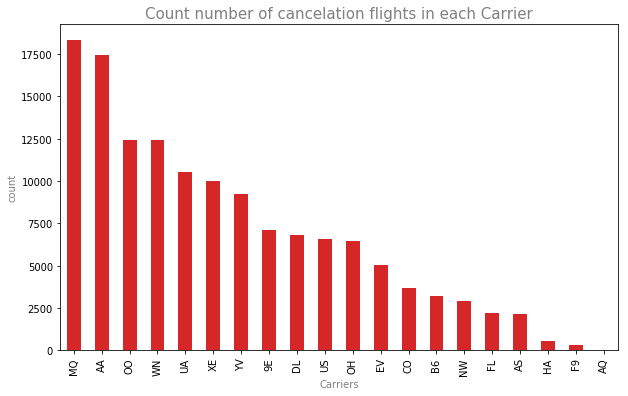

In [4]:
# bar chart for the Carrier by cancellation flight
base_color = sb.color_palette()[3]
Carrier_.plot(kind='bar', figsize=(10,6), color = base_color);

plt.title('Count number of cancelation flights in each Carrier', fontsize=15, color='grey')
plt.xlabel('Carriers', fontsize=10, color='grey')
plt.ylabel('count', fontsize=10, color='grey')

# save
plt.savefig('Carrier_by_cancellation_flight', dpi=70, bbox_inches='tight');

## Compare the average of departure time in the 80s with 90s and 20s

In the 80s The preferred time for the flight to occur was at 7:00 AM with 139778 flights with a large difference with the rest of times.
And In the 90s was at 7:00 AM with 226501 flights with a large difference with the rest of times either.
Finally, In the 20s was at 6:00 AM with 187863 flights with a few difference with the 7:00 AM that was got 181393 flights, and the difference just 6470 flights.

In [5]:
# Load Dataset samp.csv
top_val_80s = pd.read_csv('top_val_80s.csv', encoding = 'utf-8')
top_val_80s.head()

,count,time,newtime,year
0,139778,700,07:00:00,80s
1,63283,800,08:00:00,80s
2,56234,900,09:00:00,80s
3,53695,1600,16:00:00,80s
4,52088,1200,12:00:00,80s


In [6]:
# Load Dataset samp.csv
top_val_90s = pd.read_csv('top_val_90s.csv', encoding = 'utf-8')
top_val_90s.head()

,count,time,newtime,year
0,226501,NaN,NaN,90s
1,187024,700.0,07:00:00,90s
2,105248,800.0,08:00:00,90s
3,92030,630.0,06:30:00,90s
4,89260,900.0,09:00:00,90s


In [7]:
# Load Dataset samp.csv
top_val_20s = pd.read_csv('top_val_20s.csv', encoding = 'utf-8')
top_val_20s.head()

,count,time,newtime,year
0,187863,600,06:00:00,20s
1,181393,700,07:00:00,20s
2,119188,800,08:00:00,20s
3,114609,630,06:30:00,20s
4,91521,900,09:00:00,20s


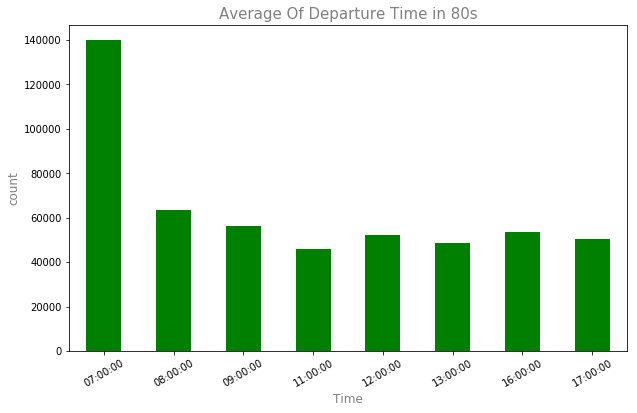

In [8]:
# plot bar charts to count Departure time for flights in the 80s

plt.figure(figsize = [10, 6])

top_val_80s.groupby('newtime')['count'].mean().plot(kind='bar', color = '#008000')
# Add a title of chart and for x, y labels
plt.title('Average Of Departure Time in 80s', fontsize=15, color='grey')
plt.xlabel('Time', fontsize=12, color='grey')
plt.ylabel('count', fontsize=12, color='grey');
plt.xticks(rotation = 30);

# save
plt.savefig('Average_Departure_Time_80s', dpi=70, bbox_inches='tight');

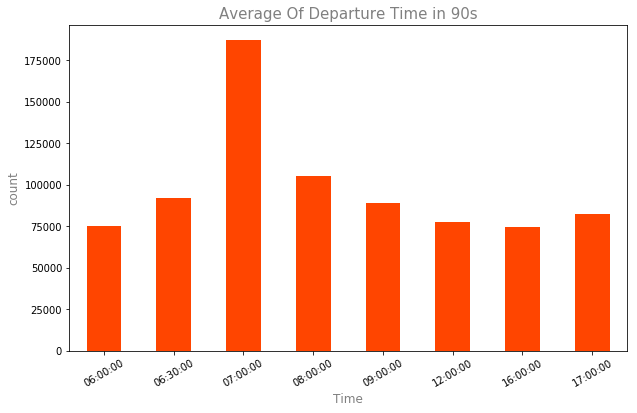

In [9]:
# plot bar charts to count Departure time for flights in the 90s

plt.figure(figsize = [10, 6])

top_val_90s.groupby('newtime')['count'].mean().plot(kind='bar', color = '#FF4500')
# Add a title of chart and for x, y labels
plt.title('Average Of Departure Time in 90s', fontsize=15, color='grey')
plt.xlabel('Time', fontsize=12, color='grey')
plt.ylabel('count', fontsize=12, color='grey');
plt.xticks(rotation = 30);

# save
plt.savefig('Average_Departure_Time_90s', dpi=70, bbox_inches='tight');

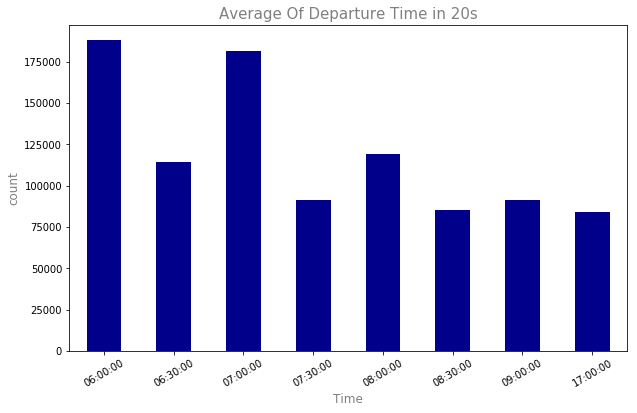

In [10]:
# plot bar charts to count Departure time for flights in the 20s

plt.figure(figsize = [10, 6])

top_val_20s.groupby('newtime')['count'].mean().plot(kind='bar', color = '#00008B')
# Add a title of chart and for x, y labels
plt.title('Average Of Departure Time in 20s', fontsize=15, color='grey')
plt.xlabel('Time', fontsize=12, color='grey')
plt.ylabel('count', fontsize=12, color='grey');
plt.xticks(rotation = 30);

# save
plt.savefig('Average_Departure_Time_20s', dpi=70, bbox_inches='tight');

## The distribution of arrival delay & departure delay  with distance

The distribution of distance with arrival and departure delay seems to be alike. There are a big distribution on the short miles, but it goes less on longest miles. Also, there is a positive correlation between distance and arrival delay. And there is a positive correlation between distance and departure delay.

In [11]:
# Load Dataset samp.csv
samp = pd.read_csv('samp.csv', encoding = 'utf-8')
samp.head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ArrDelay,DepDelay,Origin,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,date,weekday
0,2026.0,2015,2157.0,2140,MQ,4487,N830MQ,17.0,11.0,ORD,...,0,NaN,0,0.0,0.0,17.0,0.0,0.0,2008-11-07,Friday
1,1511.0,1430,2227.0,2138,DL,946,N710TW,49.0,41.0,LAX,...,0,NaN,0,11.0,0.0,8.0,0.0,30.0,2008-02-22,Friday
2,1745.0,1415,1856.0,1537,US,767,N202UW,199.0,210.0,PHL,...,0,NaN,0,0.0,0.0,0.0,0.0,199.0,2008-10-13,Monday
3,1105.0,1105,1237.0,1240,WN,1764,N787SA,-3.0,0.0,SAN,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-11-04,Tuesday
4,950.0,950,1044.0,1040,WN,342,N509SW,4.0,0.0,BNA,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-02-27,Wednesday


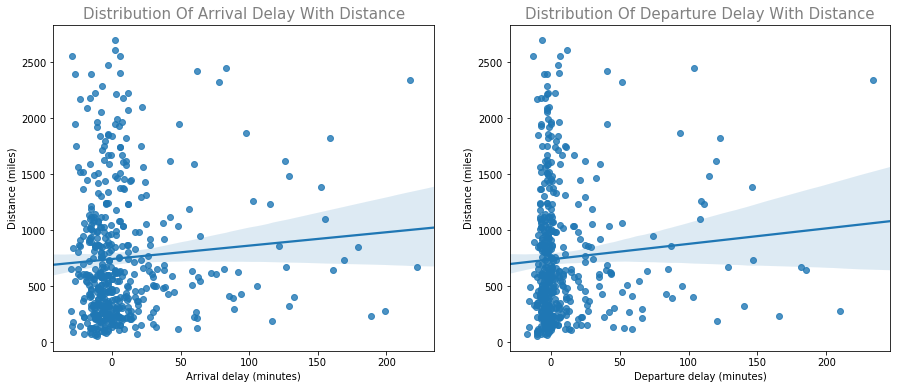

In [12]:
# scutter plots for the arrival delay & departure delay with distance

plt.figure(figsize = [15, 6])

# plot 1 - arrival
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
sb.regplot(data = samp, x = 'ArrDelay', y = 'Distance');
plt.xlabel('Arrival delay (minutes)')
plt.ylabel('Distance (miles)')
plt.title('Distribution Of Arrival Delay With Distance', fontsize=15, color='grey');

# plot 2 - departure
plt.subplot(1, 2, 2)
sb.regplot(data = samp, x = 'DepDelay', y = 'Distance');
plt.xlabel('Departure delay (minutes)')
plt.ylabel('Distance (miles)')
plt.title('Distribution Of Departure Delay With Distance', fontsize=15, color='grey');



# save
plt.savefig('arrival_departure_delay_with_distance', dpi=70, bbox_inches='tight');

## The relationship between weekday with distance

There is a monotonic relationship between distance and the weekday. The distribution for all days is much peaked. And the all days seem as alike, from approximately 1200 miles to 3700 miles the distribution are much tinier from the 1000 miles and down. The longtails suggest outliers on all days with the highest of distance miles from approximately 3700 miles to over 5000 mails. Finally, there isn't much different for the distribution on all days.

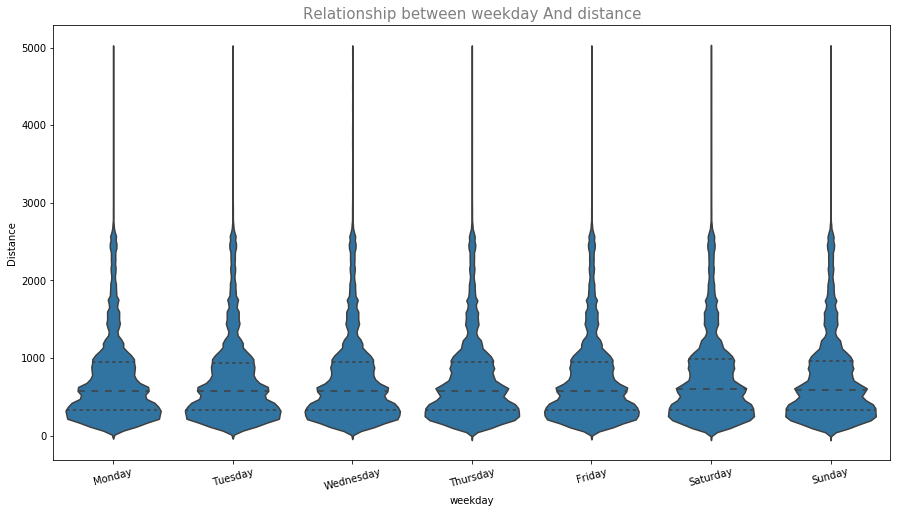

In [13]:
# Violin plot for the weekday with Distance

base_color = sb.color_palette()[0]
plt.figure(figsize = [15, 8])
sb.violinplot(data = df_2008_clean, x = 'weekday', y = 'Distance', order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                                                   'Friday', 'Saturday', 'Sunday'], 
              color = base_color, inner = 'quartile');

plt.xticks(rotation = 15);
plt.title('Relationship between weekday And distance', fontsize=15, color='grey');

# save
plt.savefig('relationship_weekday_with_distance', dpi=70, bbox_inches='tight');

## The destination cities that are home to more delays with different distance

The longest delay is in Atlanta(ATL) destination with approximately 360 minutes, and with approximately 750 or 800 miles. The second-longest delay is in Chicago(ORD) destination with approximately 240 minutes, and with 800 or 850 miles. Then also we have another long delay with Chicago and Atlanta destination, these destinations got the hight distance with a delay between 1 minute to 140 minutes. The distribution for the delay with distance is got much distribution in the low distance then goes to less in the high distance. Finally, there is a positive correlation between distance and late aircraft delay.

In [14]:
# Load Dataset drop_Dest_samp_2.csv
Dest_samp_2 = pd.read_csv('drop_Dest_samp_2.csv', encoding = 'utf-8')
Dest_samp_2.head()

,Dest,Distance,LateAircraftDelay
0,ATL,1946.0,30.0
1,ATL,227.0,39.0
2,ATL,515.0,8.0
3,ATL,247.0,18.0
4,ATL,516.0,10.0


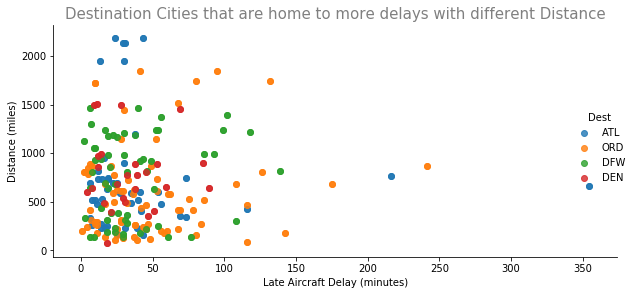

In [15]:
# FacetGrid plot for get the Dest city with LateAircraftDelay and Distance

g = sb.FacetGrid(data = Dest_samp_2, hue ='Dest', height = 4, aspect = 2)
g = g.map(sb.regplot, "LateAircraftDelay", "Distance", fit_reg = False, )

g.add_legend()
g = g.map(sb.regplot,"LateAircraftDelay", "Distance", fit_reg=False);

# Add a title of chart and for x, y labels
plt.title('Destination Cities that are home to more delays with different Distance', fontsize=15, color='grey')
plt.xlabel('Late Aircraft Delay (minutes)')
plt.ylabel('Distance (miles)');

# save
plt.savefig('Destination_Cities_delays_with_Distance', dpi=70, bbox_inches='tight');

In [ ]:
!jupyter nbconvert "slide_deck-Flights.ipynb" --to slides --post serve --template output_toggle.tpl